# Decision Tree 실습
- scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.  
- CART에서는 Gini index 사용. criterion 파라미터를 통해 entropy도 사용 가능  
- [scikit-learn decision tree Manual](https://scikit-learn.org/stable/modules/tree.html#tree)과 dsl 3기 이진우, 손동재님의 코드를 참고하였습니다.

## 1. 함수 익히기 / 연습

- classification

In [1]:
# sklearn 패키지에서 tree를 import 
from sklearn import tree

In [2]:
# X, Y 데이터셋
X = [[0, 0], [1, 1]] # 두 개의 feature을 가지고 있음
Y = [0, 1] # each class

In [3]:
# classification tree 구축 및 적합
clf = tree.DecisionTreeClassifier() # tree 객체에서 DecisionTreeClassifier()를 불러와서 clf(classifier)에 저장
clf = clf.fit(X, Y)

In [4]:
# 구축된 tree에 의해 새로운 item 들어왔을 때 class 예측
clf.predict([[2. , 2. ]])

array([1])

In [5]:
# 각 class가 예측될 확률
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

- regression

In [6]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

In [7]:
# regression tree 구축
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

In [8]:
clf.predict([[1, 1]])

array([0.5])

## 2. iris dataset 

### 재귀적 분기(트리 만들기)

- 모듈 불러오기

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [10]:
!pip install pydot
import pydot
from IPython.core.display import Image 

- 데이터 로드

In [11]:
iris = load_iris()

In [12]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
print(iris.feature_names) # 독립변수 4개
print(iris.target_names) # 종속변수 3개의 class 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [15]:
X, y = iris.data, iris.target

- 트리 구축  
classifier 설정  
현재 데이터는 종속변수가 범주형 변수 -> classification tree 만들어야 함. 

In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

- 트리의 시각화

In [17]:
# export_graphviz: 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만든다
# out_file: 파일로 내보내고자 하는 것이 아니라 직접 그리기 때문에 None
dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, # 색깔 넣어줌
                                rounded = True, # 반올림
                                special_characters = True) # 특수문자를 대비해서 넣어주는 옵션

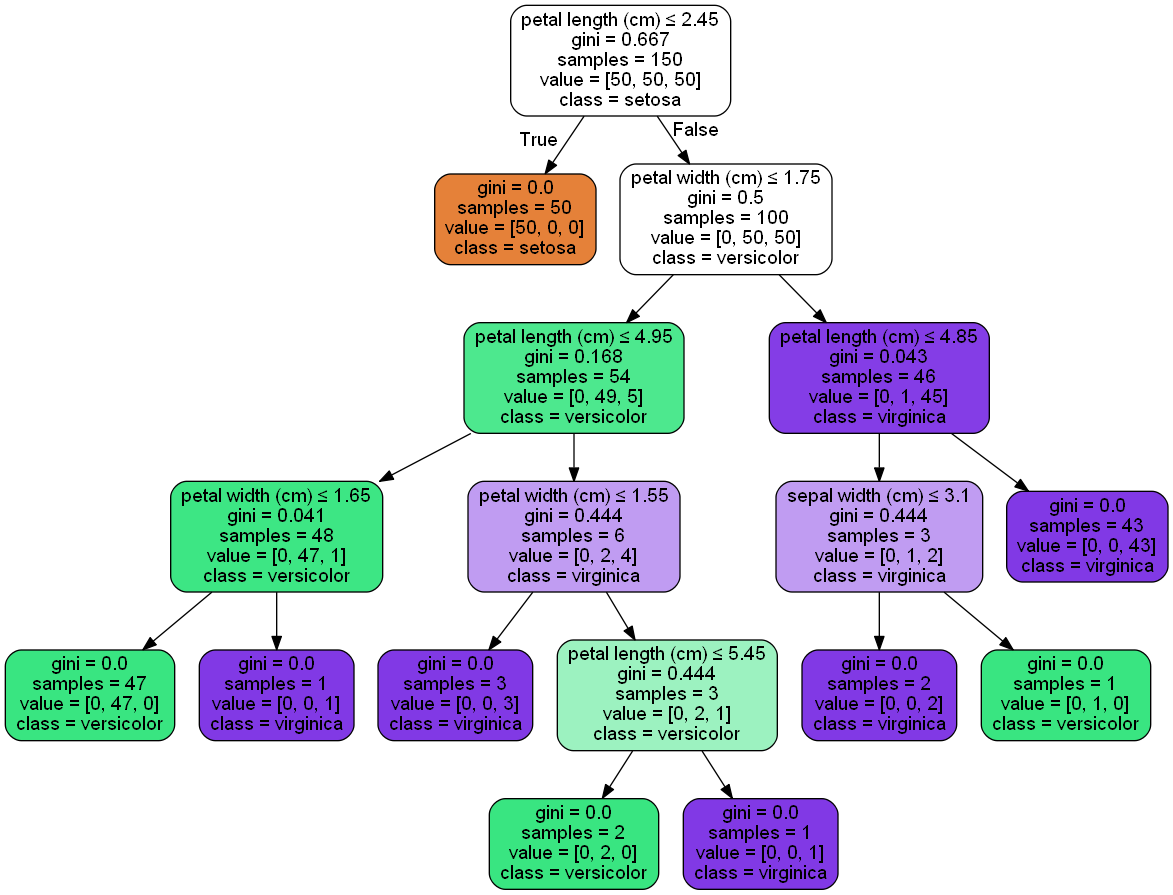

In [18]:
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)
# 같은 색 계열이면 같은 집단으로 분류된 것임.

In [19]:
# 함수로 만듦.
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

너무 자세하게 분류를 하고 있음. 오버피팅이 될 위험이 있다.

### Pruning: 사전 가지치기
여러 parameters를 이용  
    - max_depth: 트리의 최대 depth를 결정
    - min_samples_split: split하기 위해 노드가 가지고 있어야 하는 최소 샘플 개수
    - min_samples_leaf: leaf node가 가져야 하는 최소 샘플 개수
    - max_leaf_nodes: leaf node 최대 개수

---
1. max_depth

In [20]:
feature_names = iris.feature_names
class_names = iris.target_names

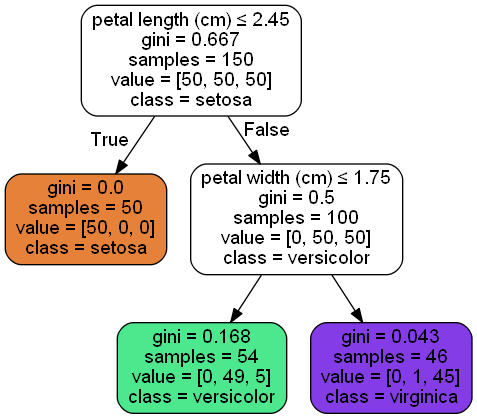

In [21]:
clf = DecisionTreeClassifier(max_depth = 2) # 2층까지 내려가겠다
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

2. min_samples_split

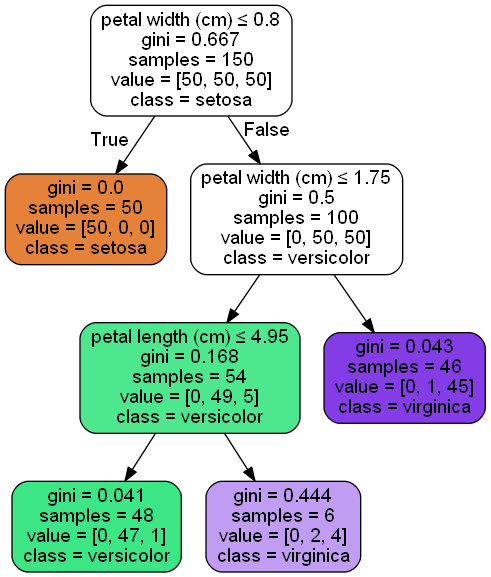

In [22]:
clf = DecisionTreeClassifier(min_samples_split = 50)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

3. min_samples_leaf

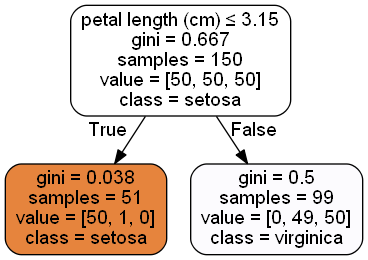

In [23]:
clf = DecisionTreeClassifier(min_samples_leaf = 51)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

4. max_leaf_nodes

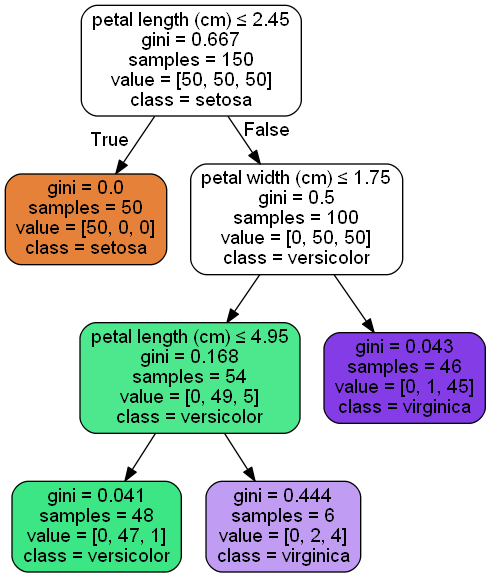

In [24]:
clf = DecisionTreeClassifier(max_leaf_nodes = 4)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

## 3.  Breast Cancer dataset 

In [25]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
class_names = load_breast_cancer().target_names

In [26]:
print(feature_names)
print(class_names) # 2개의 class

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

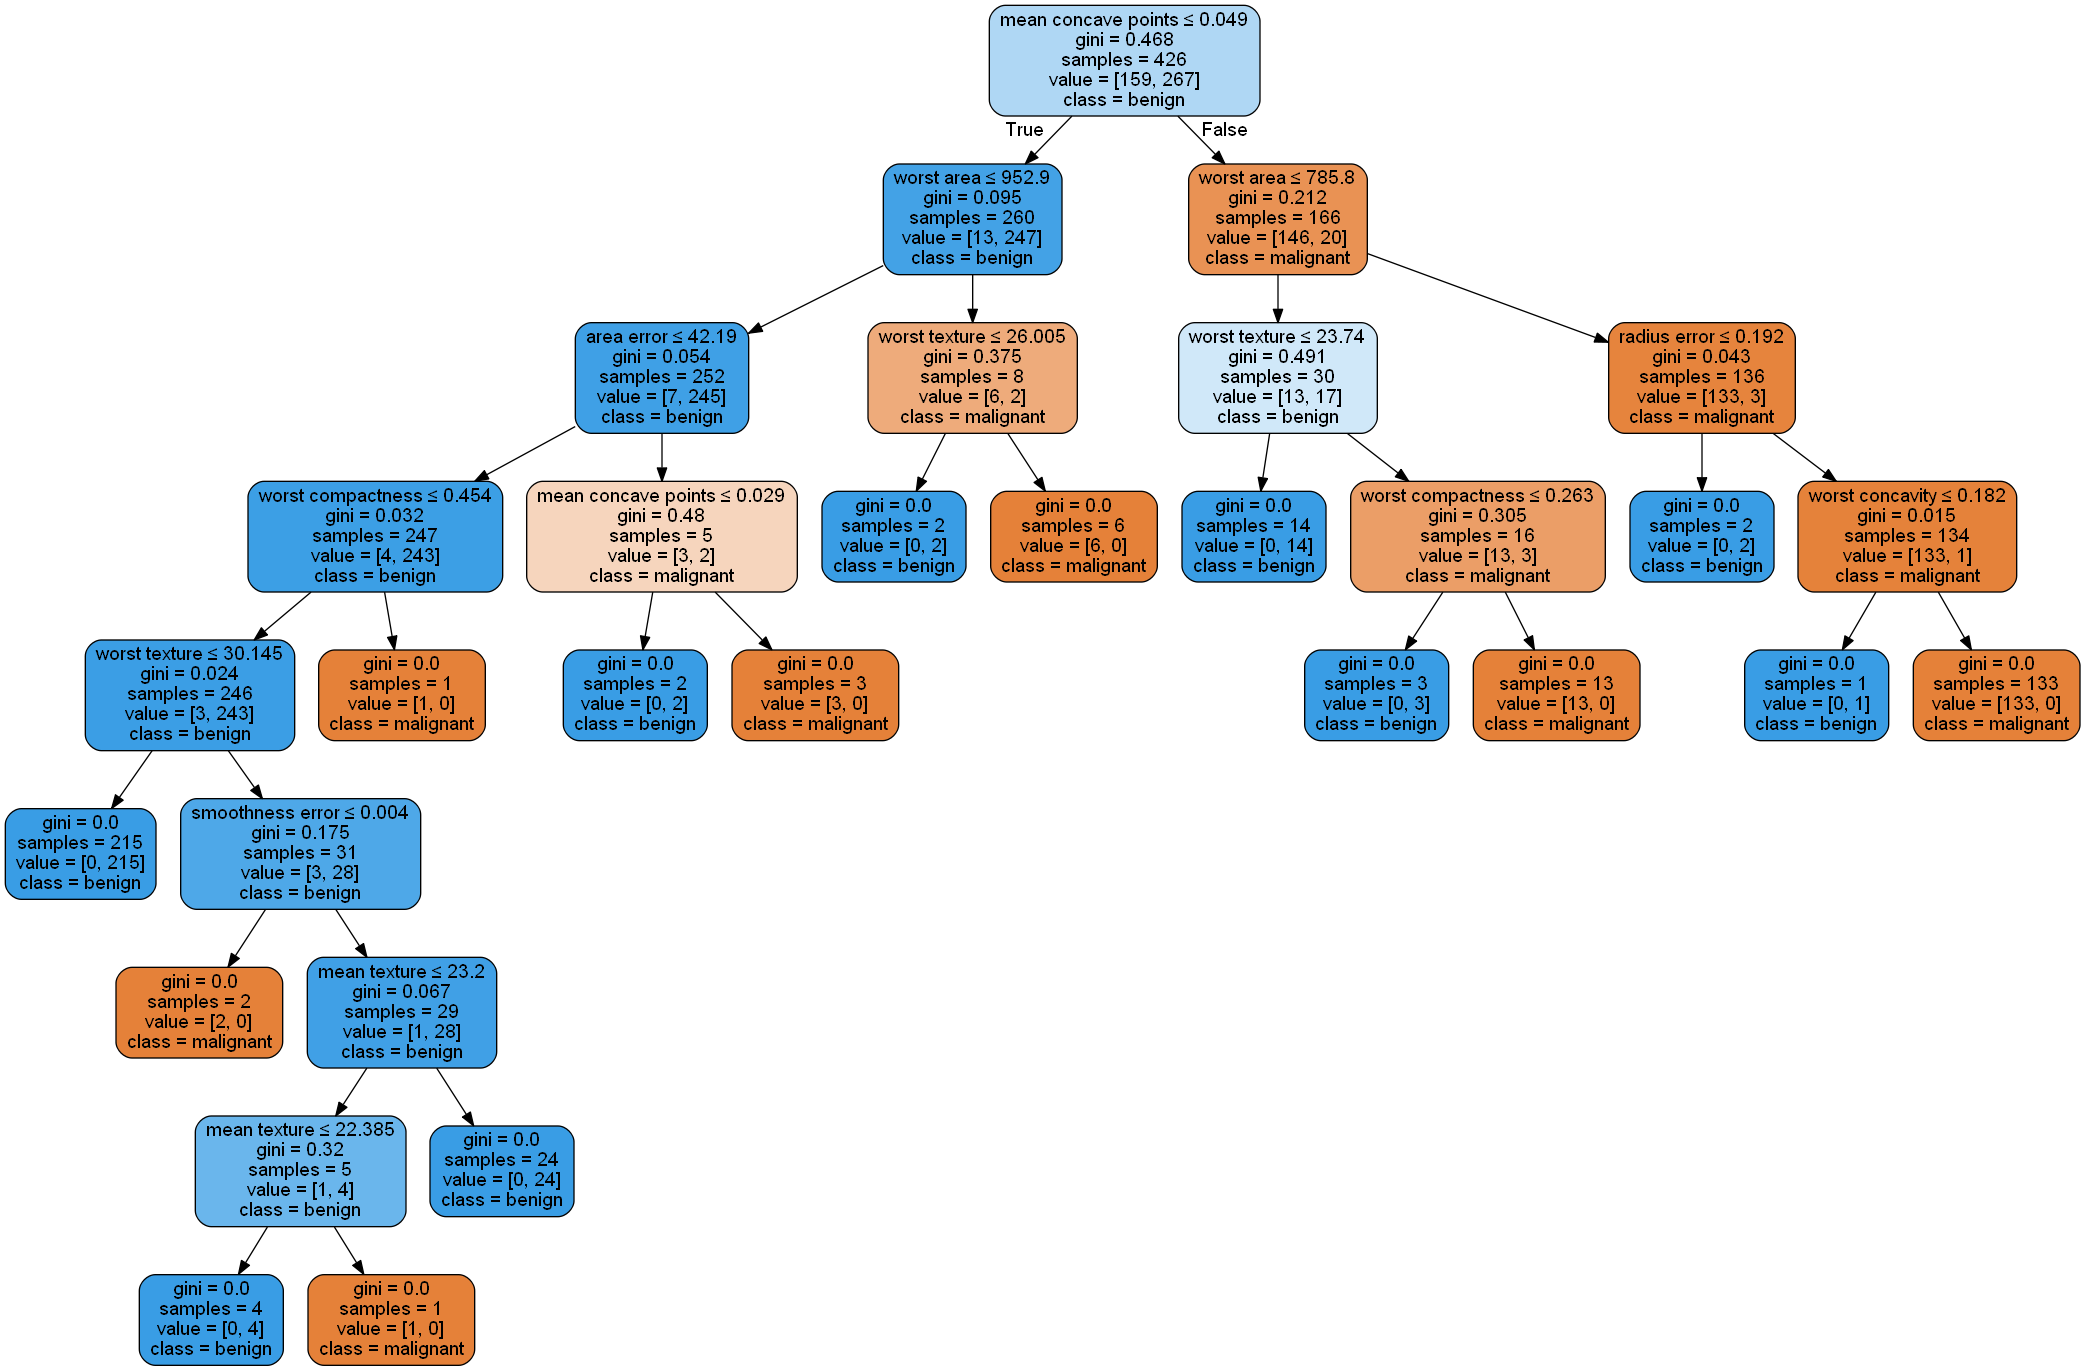

In [28]:
# Pruning 되기 전 
clf = DecisionTreeClassifier(random_state=0)
tree_nottuned = clf.fit(X_train, y_train)
draw_decision_tree(tree_nottuned, feature_names, class_names)

### 사전 가지치기: hyperparameter tuning
사전 가지치기에서 좋은 parameter는 무엇인가  
max_depth, min_samples_split에 대한 hyperparameter tuning

In [29]:
from sklearn.model_selection import cross_validate
import numpy as np
scoring = ['f1','precision','recall']
tree_scores = cross_validate(tree_nottuned, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)

print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(tree_scores['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.923


In [30]:
from sklearn.model_selection import GridSearchCV # 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법

hyperparamters = {'max_depth': list(range(2, 8)),  'min_samples_split': list(range(2, 20))}
GridCV = GridSearchCV(estimator=tree_nottuned, param_grid=hyperparamters, cv=5, verbose=1) 
GridCV.fit(X_train, y_train)
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 7, 'min_samples_split': 4}

In [31]:
tree_tuned = DecisionTreeClassifier(max_depth=7, min_samples_split=4, random_state=0)
tree_tuned_scores = cross_validate(tree_tuned, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)

print("Tree parameter tuned (X) - F1 Score : {:.3f}".format(np.mean(tree_scores['test_f1'])))
print("Tree parameter tuned (O) - F1 Score : {:.3f}".format(np.mean(tree_tuned_scores['test_f1'])))

Tree parameter tuned (X) - F1 Score : 0.923
Tree parameter tuned (O) - F1 Score : 0.935


### 사후 가지치기 with cost complexity pruning  
full tree를 만든 후에 구분된 영역을 통합  
[sklearn 참고](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)  

ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning  
non-terminal node에 해당하는 **effective alpha 값이 작은 순서대로 가지치기**되고(weak link),  
남아있는 effective alpha 값이 ccp_alpha보다 크면 가지치기 종료. 

---

sklearn의 cost complexity pruning 함수를 사용하기 위해서는 버전을 업데이트 해주어야한다. (최소한 0.22.1버전이 요구됨)

In [32]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [34]:
import matplotlib.pyplot as plt

#### total impurity of leaves vs effective alphas of pruned tree  
**DecisionTreeClassifier.cost_complexity_pruning_path** returns the **effective alphas** and the **corresponding total leaf impurities** at each step of the pruning process.(alpha가 커지면 트리가 작아짐. -> total impurity of leaves 커짐.)

In [35]:
clf = DecisionTreeClassifier(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)

# alphas, inpurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

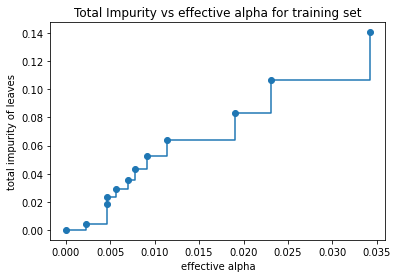

In [36]:
fig, ax = plt.subplots() # plt.subplots() 편의 함수는 Figure 객체를 생성하고 Figure.subplots()를 호출하여 리턴
# axes: 좌표평면을 나타내는 변수
# ccp_alphas[-1]은 노드가 하나밖에 없는 트리임.
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

# alpha값이 커지면 트리가 작아짐.
# total impurity of leaves 커짐.

- 각 effective alphas 이용해 decision tree 만들기

Number of nodes in the 1th tree is: 31 with ccp_alpha: 0.0


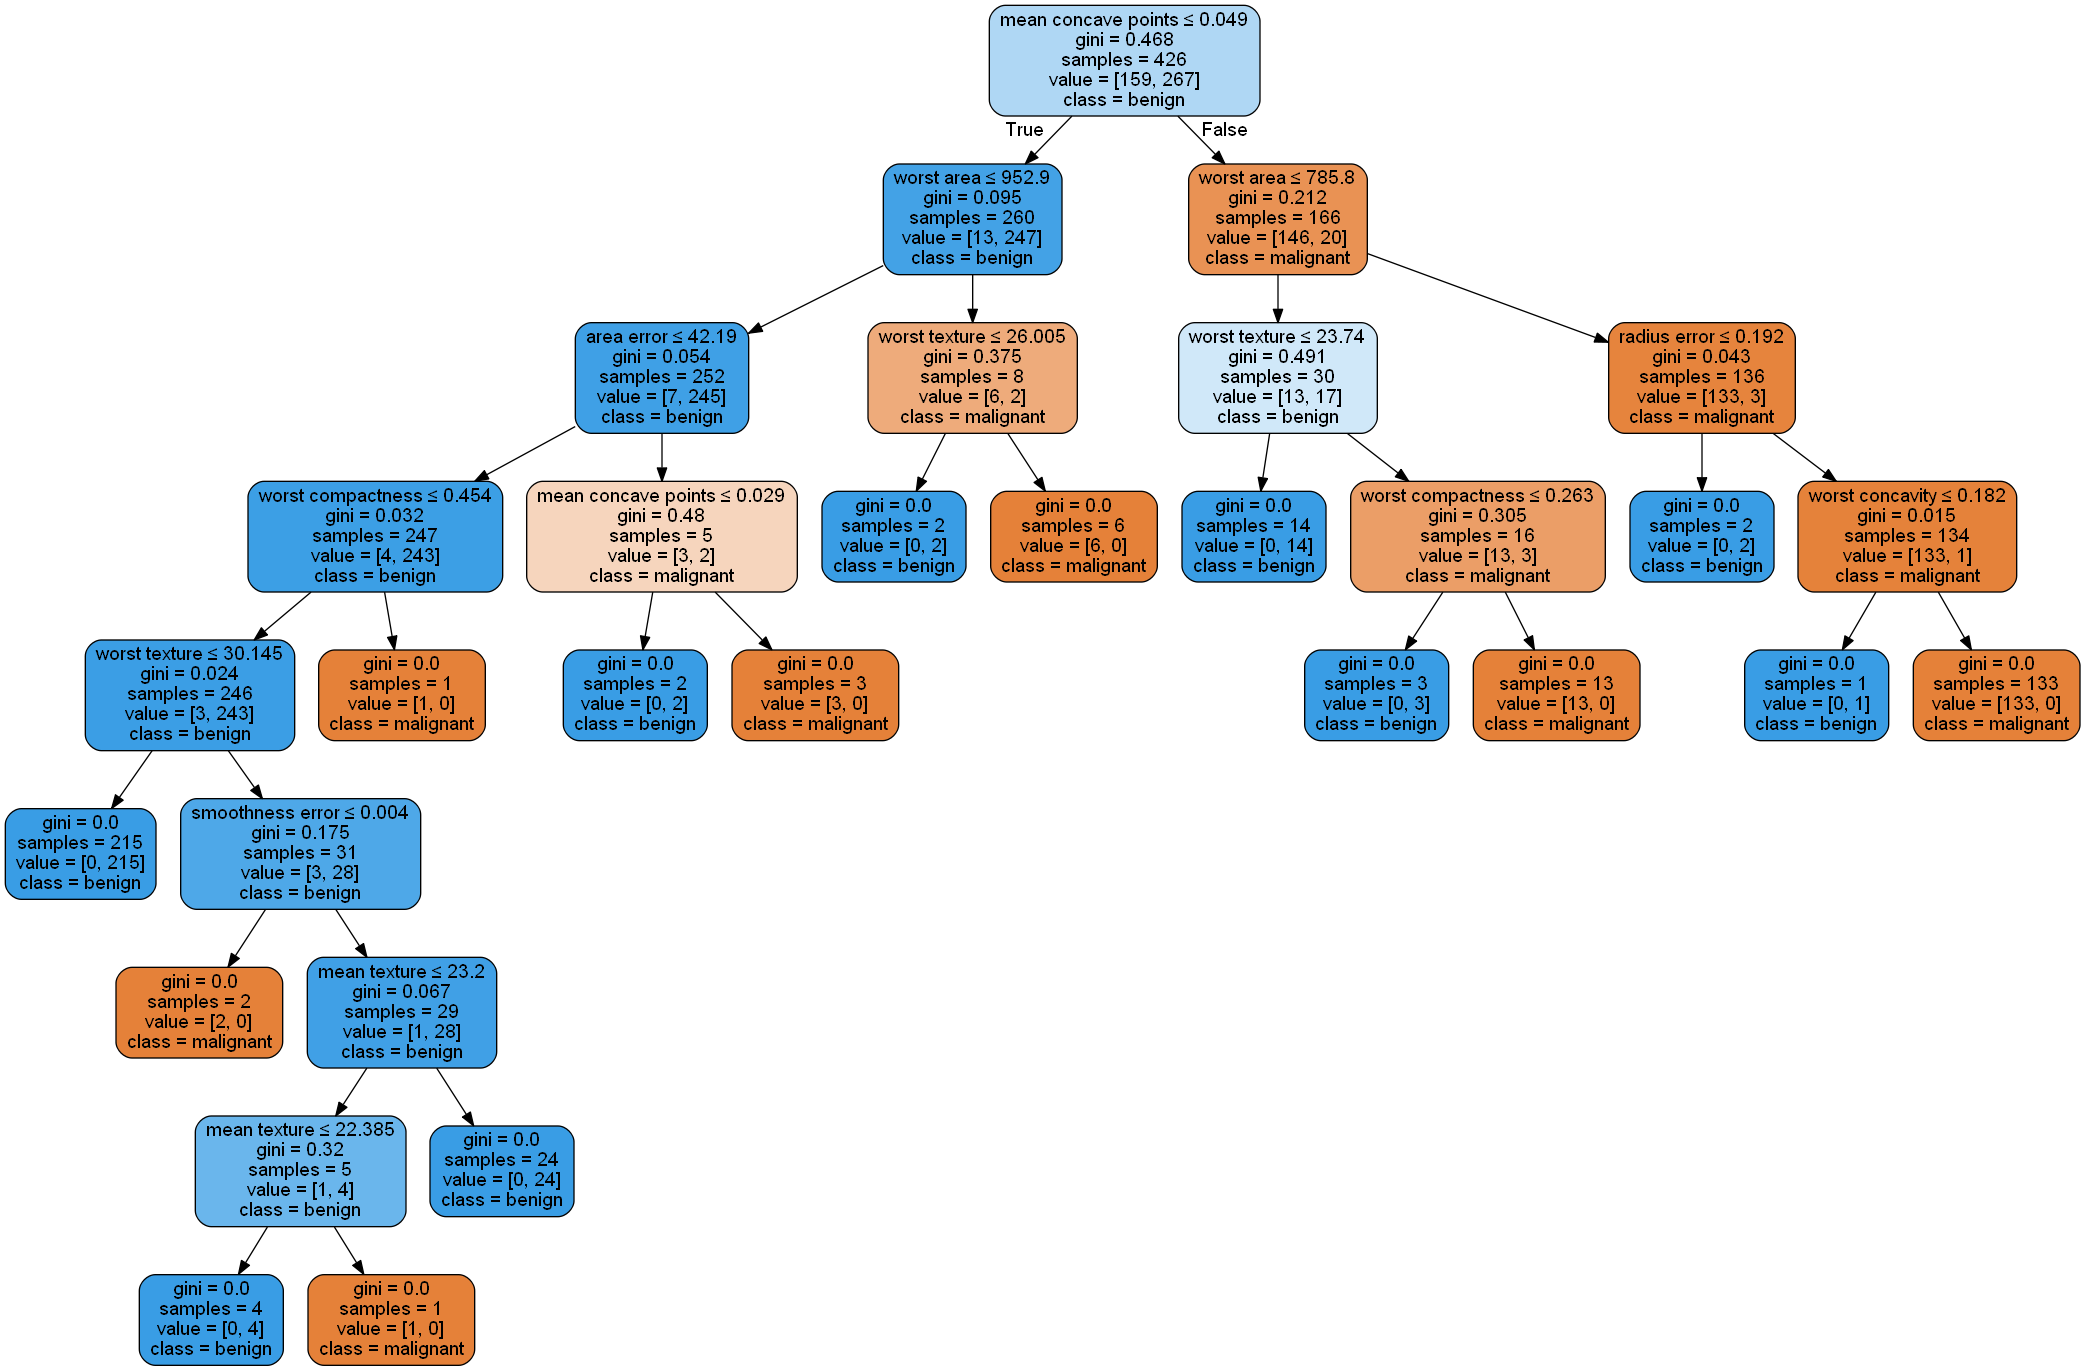

Number of nodes in the 2th tree is: 27 with ccp_alpha: 0.0022664723976040134


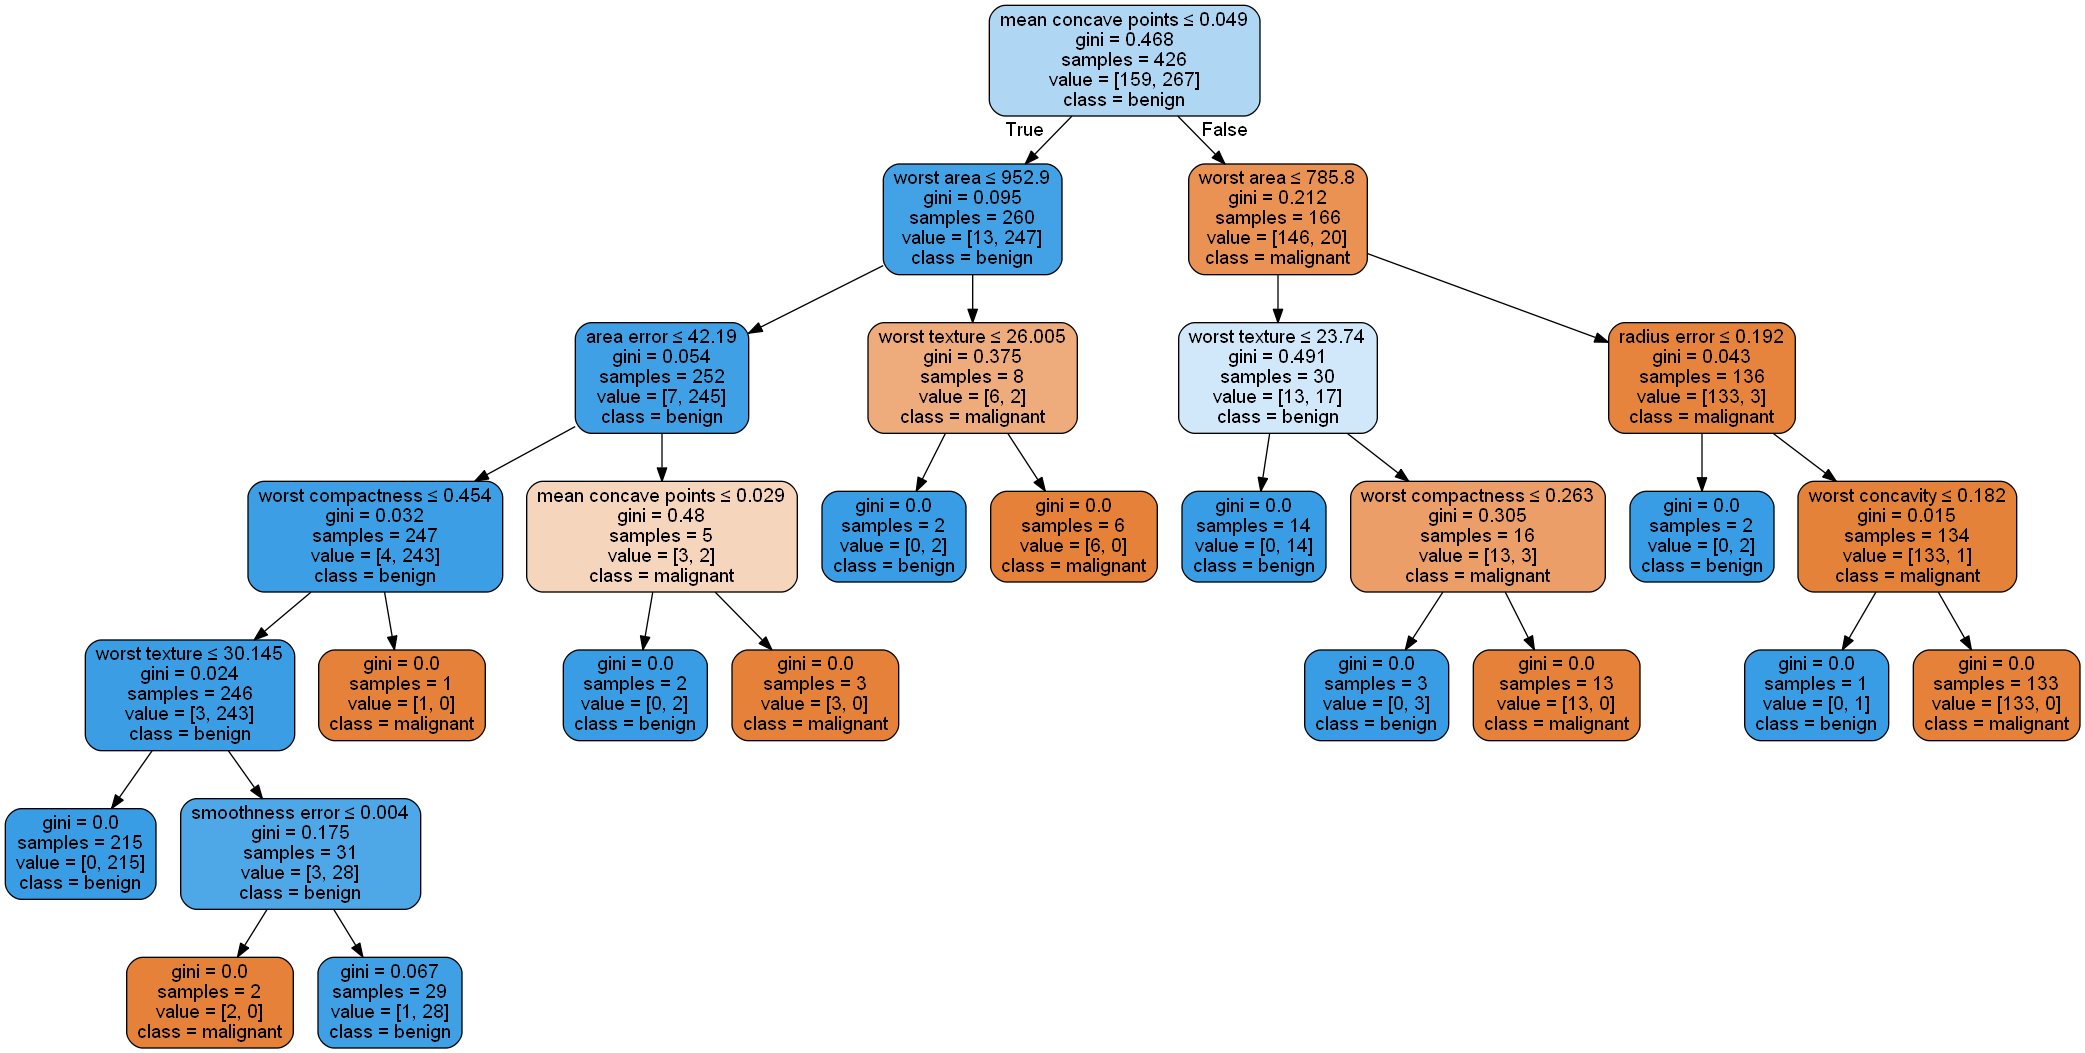

Number of nodes in the 3th tree is: 21 with ccp_alpha: 0.004647426339100881


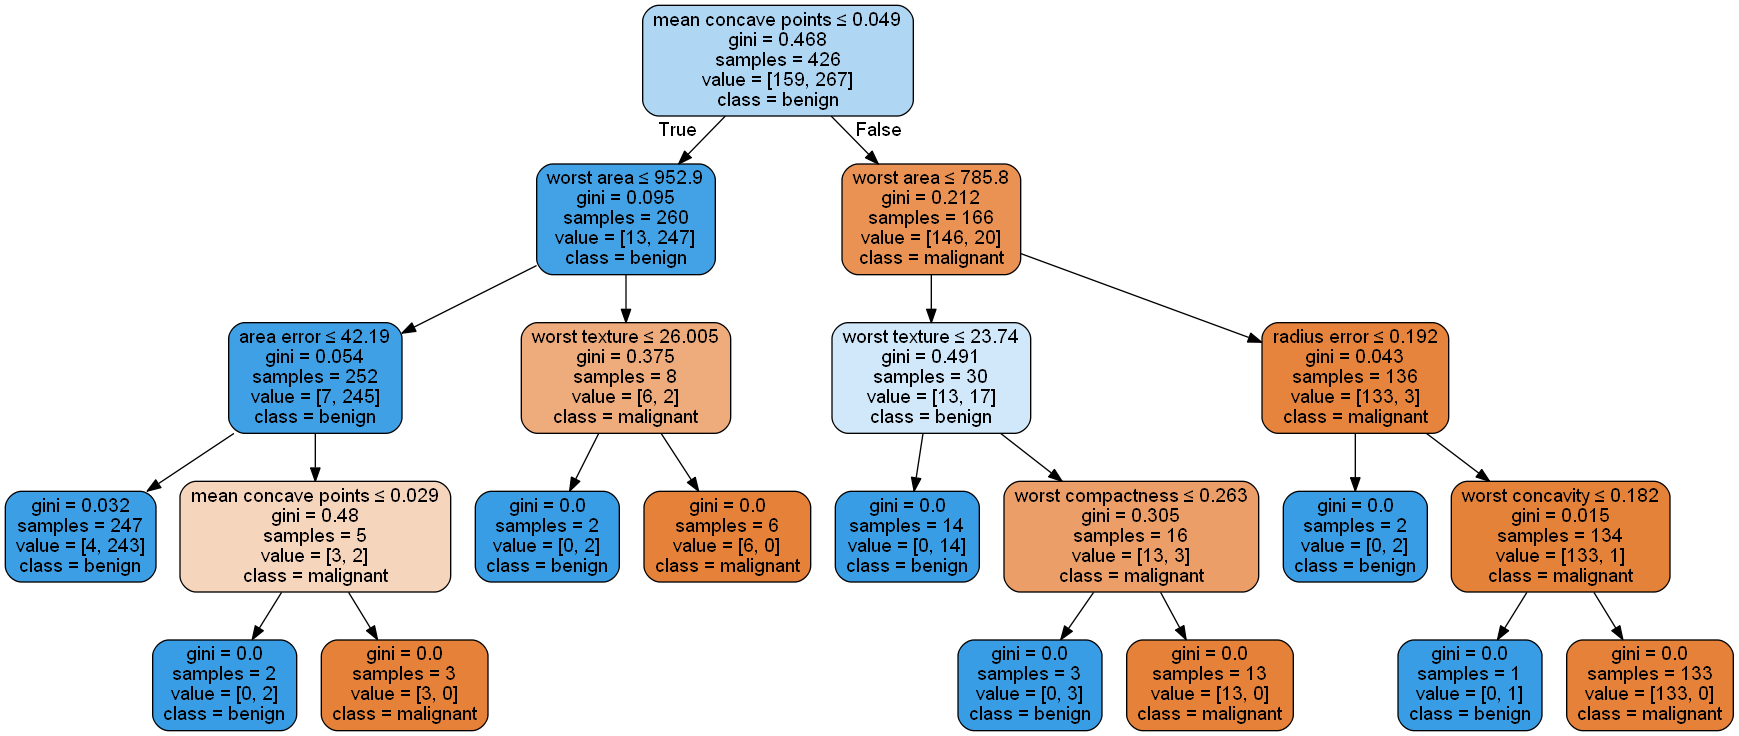

Number of nodes in the 4th tree is: 19 with ccp_alpha: 0.004659799593581376


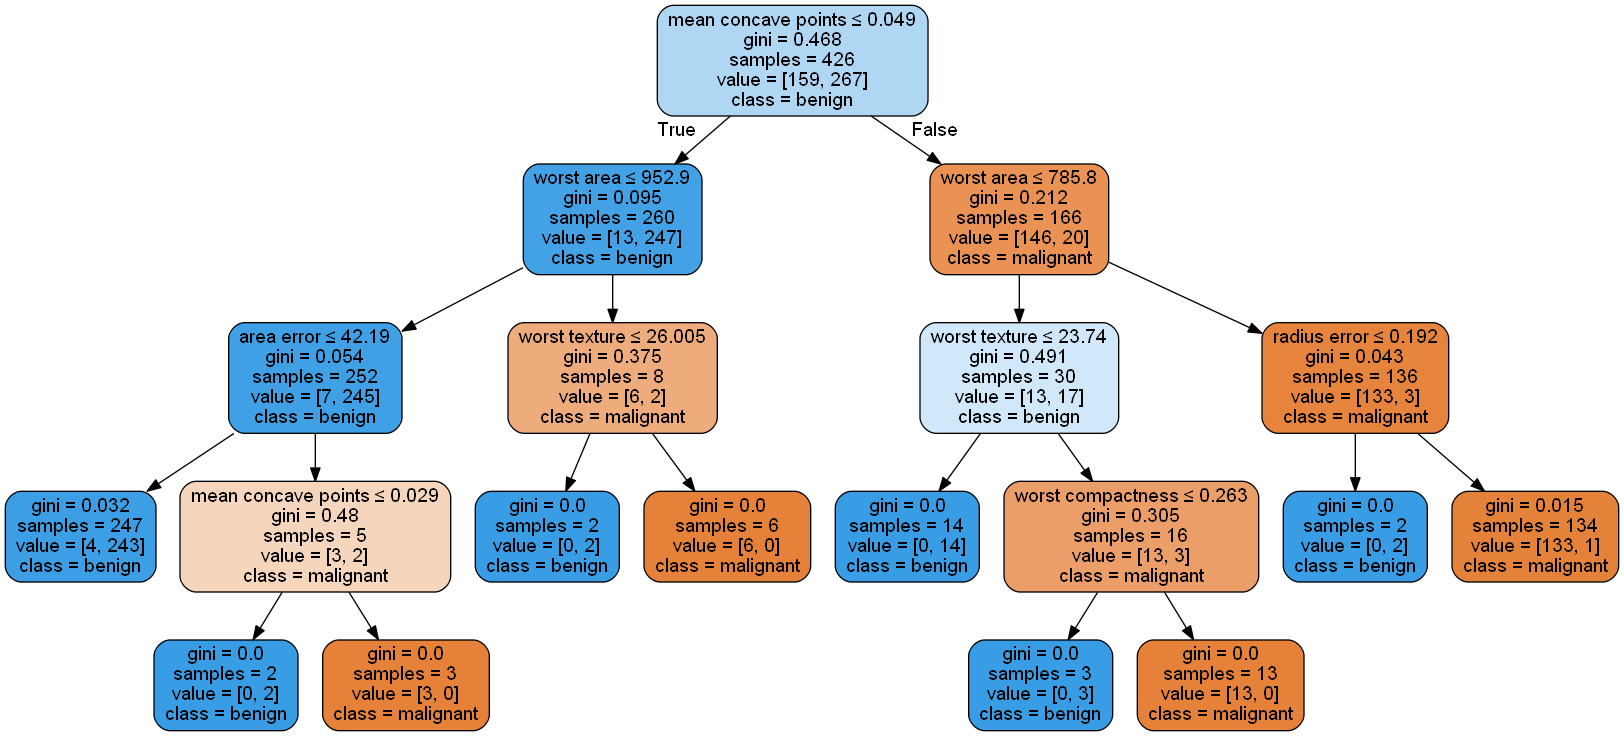

Number of nodes in the 5th tree is: 17 with ccp_alpha: 0.005633802816901408


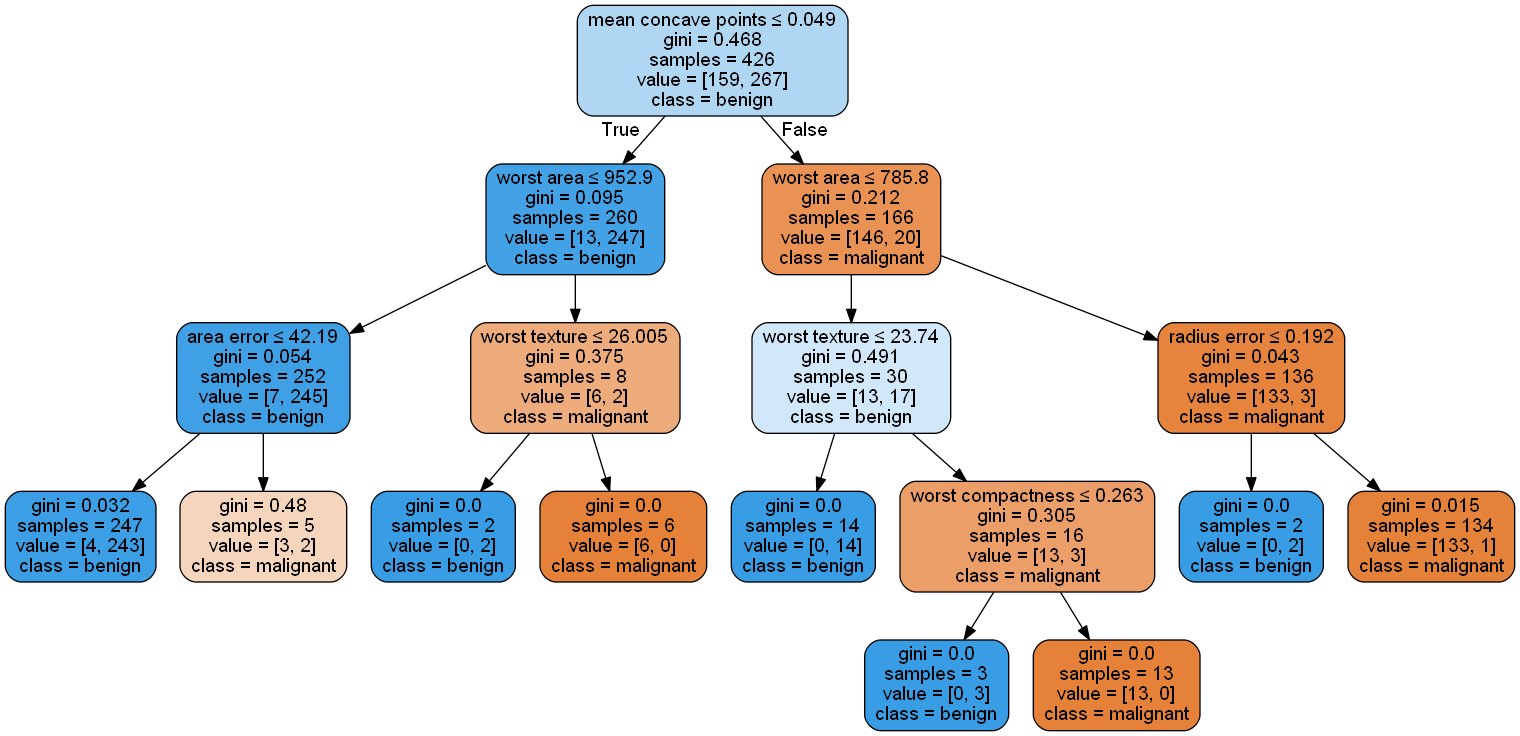

Number of nodes in the 6th tree is: 15 with ccp_alpha: 0.007042253521126761


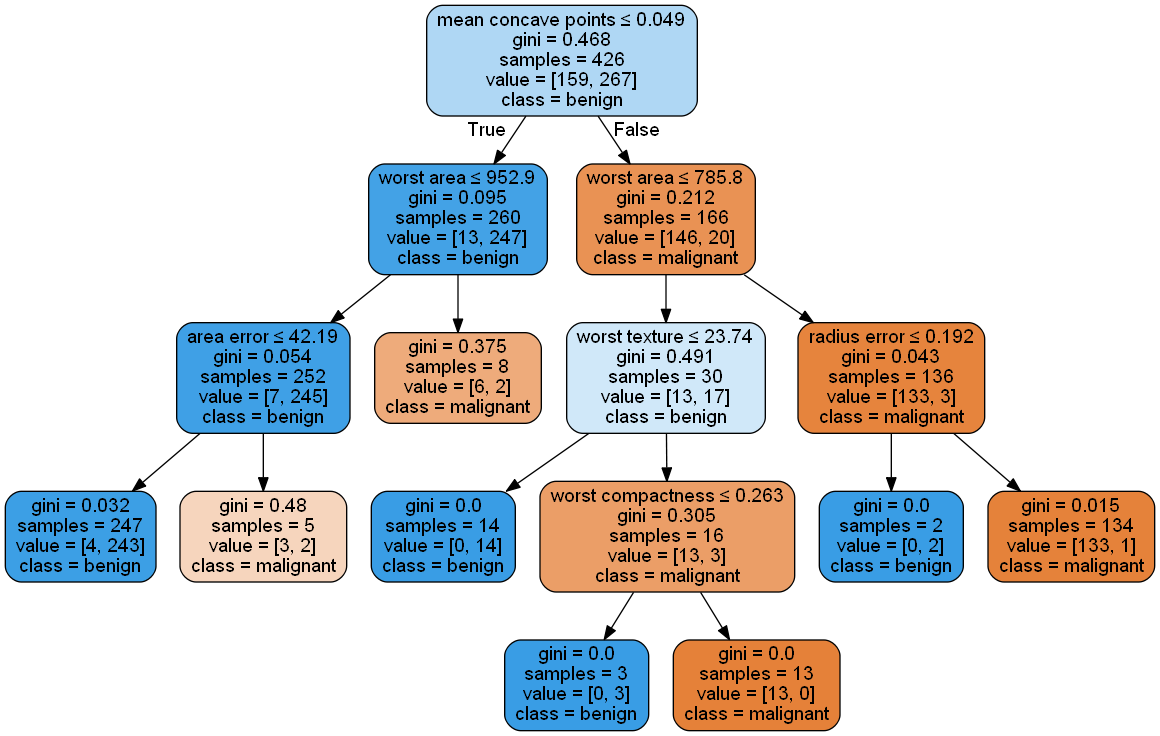

Number of nodes in the 7th tree is: 13 with ccp_alpha: 0.007841938420144537


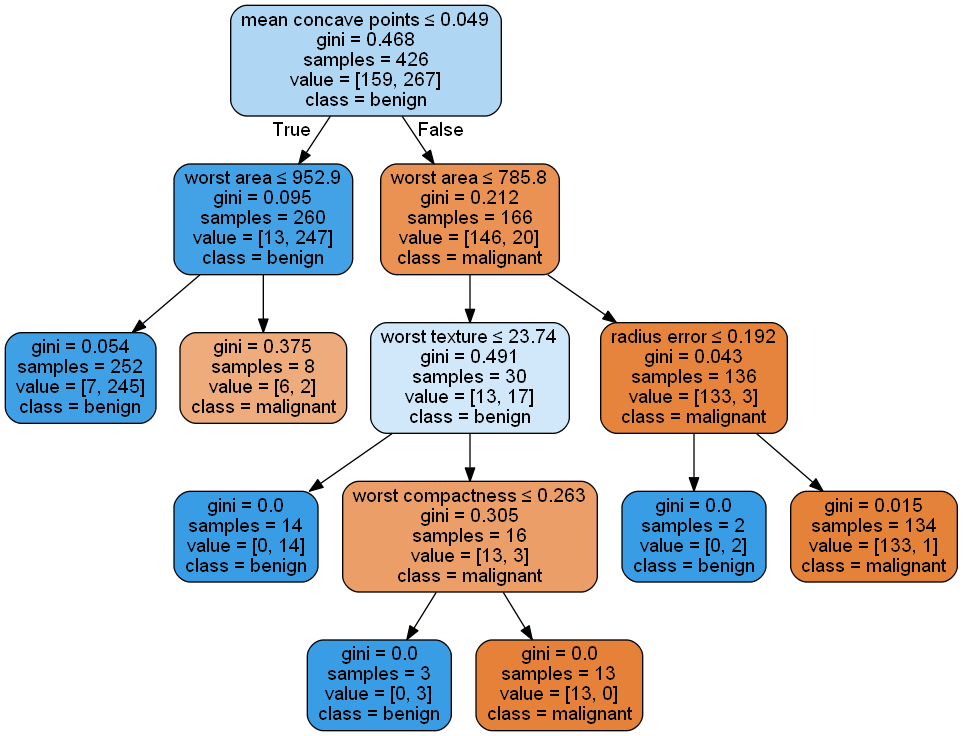

Number of nodes in the 8th tree is: 11 with ccp_alpha: 0.009114019793328328


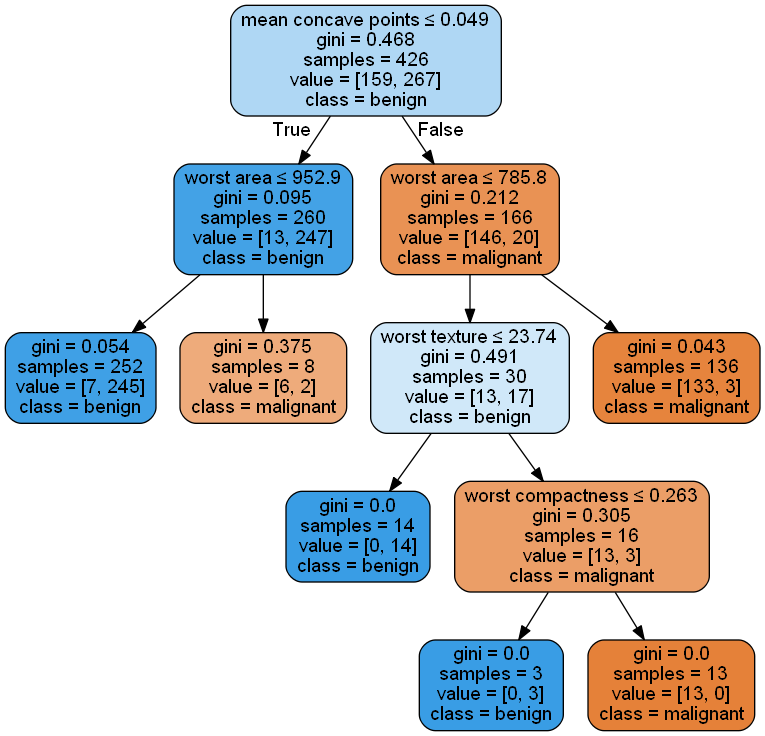

Number of nodes in the 9th tree is: 9 with ccp_alpha: 0.011443661971830986


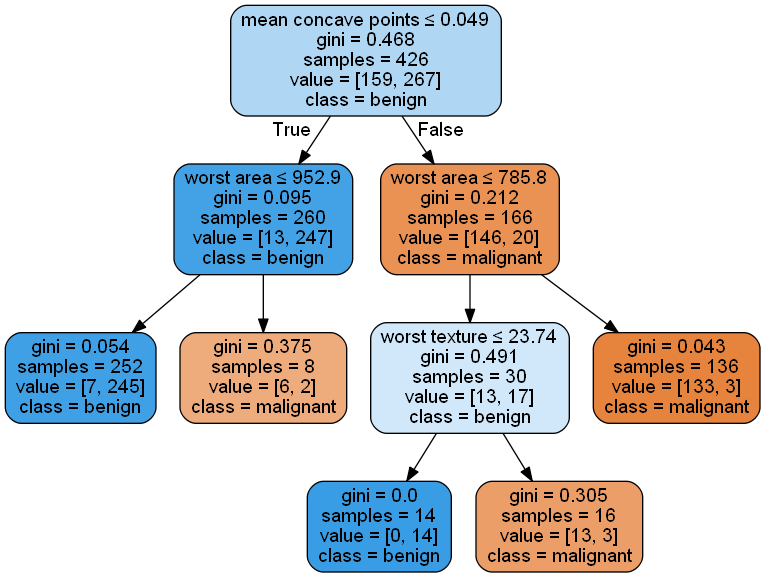

Number of nodes in the 10th tree is: 7 with ccp_alpha: 0.018988002086593604


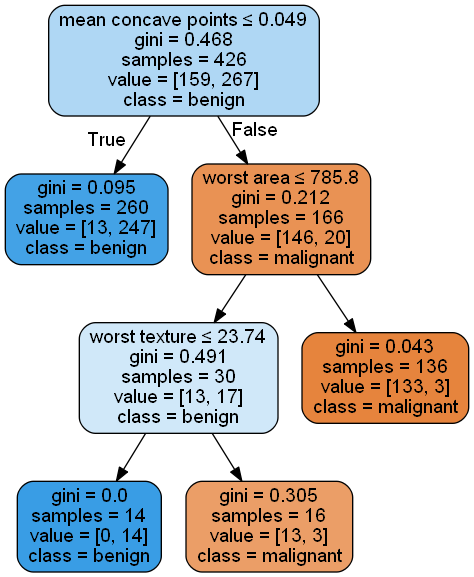

Number of nodes in the 11th tree is: 5 with ccp_alpha: 0.023141627543035996


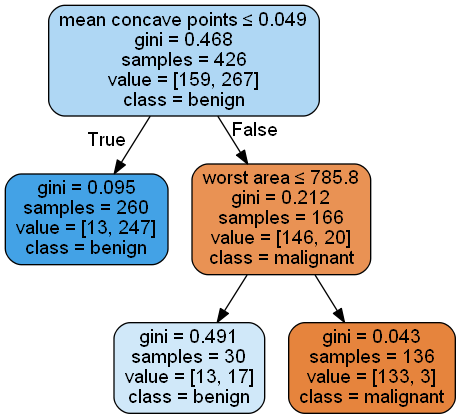

Number of nodes in the 12th tree is: 3 with ccp_alpha: 0.03422474765119576


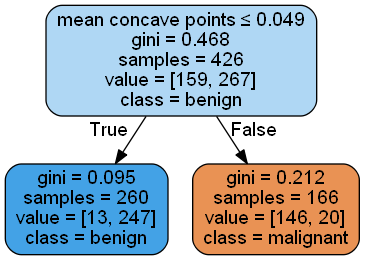

Number of nodes in the 13th tree is: 1 with ccp_alpha: 0.3272984419327777


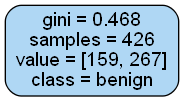

In [37]:
clfs = []
count = 0
for ccp_alpha in ccp_alphas:
    # 각 effective alphas 이용해 decision tree 만들기
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf = clf.fit(X_train, y_train)
    count += 1
    print("Number of nodes in the {}th tree is: {} with ccp_alpha: {}".format(
      count, clf.tree_.node_count, ccp_alpha))
    display(draw_decision_tree(clf, feature_names, class_names))
    clfs.append(clf)
    print("====================================================================================")

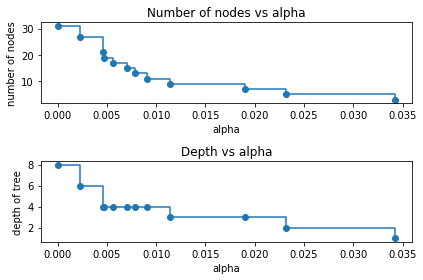

In [38]:
# 노드가 하나뿐인 마지막 tree는 제외
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# tree의 node 수
node_counts = [clf.tree_.node_count for clf in clfs]
# tree의 depth
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1)
# Number of nodes vs alpha
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
# Depth vs alpha
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs alpha for training and testing sets  
alpha에 따른 subtree의 성능 확인  
ccp_alpha가 0이면 pruning 진행되지 않음.(full tree) -> 오버피팅  

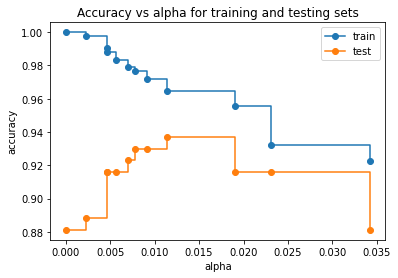

Decision tree without pruning : 31 nodes, 0.881 accuracy
Decision tree with the best pruning : 9 nodes, 0.937 accuracy


In [39]:
# testing accuracy를 높이는 최고의 ccp_alpha는?
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

print("Decision tree without pruning : {0} nodes, {1:.3} accuracy".format(tree_nottuned.tree_.node_count, tree_nottuned.score(X_test, y_test)))
print("Decision tree with the best pruning : {0} nodes, {1:.3} accuracy".format(clfs[test_scores.index(max(test_scores))].tree_.node_count, max(test_scores)))

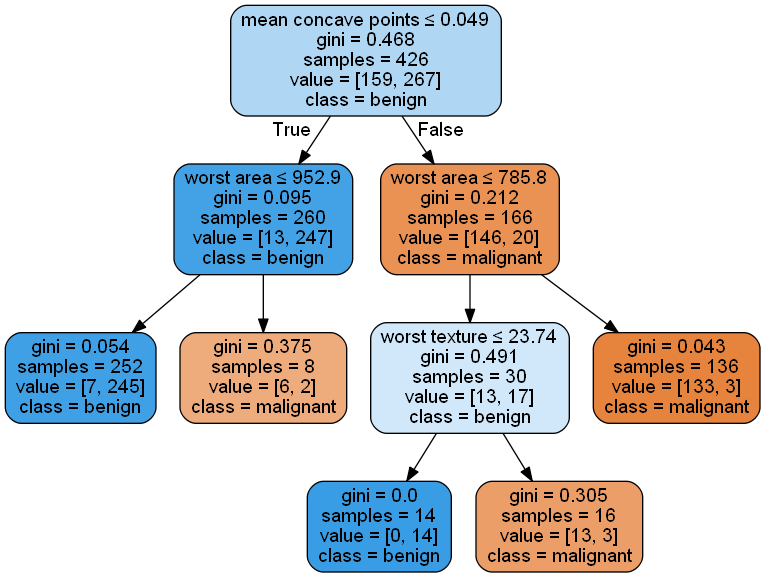

In [40]:
# testing accuracy를 높이는 최고의 ccp_alpha
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.015)
clf = clf.fit(X_train, y_train)
draw_decision_tree(clf, feature_names, class_names)

- 그래프 통해서 확인하기  
http://localhost:8888/notebooks/DSL/tree%20model/decision_tree.ipynb